In [1]:
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact


csvgiss = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv', header = [1])

csvgiss_lat = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/ZonAnn.Ts+dSST.csv', header = [0])

csvgiss = pd.merge(csvgiss, csvgiss_lat, on="Year")

csvgiss = csvgiss.apply(pd.to_numeric, errors='coerce')

csvgiss = csvgiss.dropna()

#La media J-D está repetida en la columna Glob del los datos zonales por latitud y los eliminamos para evitar duplicación.
csvgiss = csvgiss.drop(['J-D','D-N'], axis=1)

#Podríamos renombrar alguna columna de la siguiente manera
#csvgiss.rename(columns = {'Glob':'GLOBAL_MEAN'}, inplace = True)

csvgiss = csvgiss.set_index('Year')

csvgiss
#csvgiss = csvgiss.drop(csvgiss.iloc[-1].name) #locate last row index for the present year as alternative to csvgiss[csvgiss.index == 2022].index

#csvgiss.to_csv(r'/home/pedroj/Documentos/Jupyter/csvgiss.csv')

filtered = pd.DataFrame()
output = widgets.Output()

dropdown_year = widgets.Dropdown(options = csvgiss.index.tolist())
items = ['All']+csvgiss.columns.values.tolist()
dropdown_months = widgets.Dropdown(options = items)

def common_filtering(year, months):
    global filtered
    output.clear_output()
    if months == 'All':
        filtered = csvgiss[csvgiss.index == year]
    else:
        filtered = csvgiss.loc[year, months]

    with output:
        display(filtered)
        

def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_months.value)
def dropdown_months_eventhandler(change):
    common_filtering(dropdown_year.value, change.new)

dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_months.observe(dropdown_months_eventhandler, names='value')

input_widgets = widgets.HBox([dropdown_year, dropdown_months])
display(input_widgets)

output

Output()

In [2]:

def plot_anomaly(month1, palette1, month2, palette2,start_year,end_year):
    ax = csvgiss.loc[start_year:end_year].plot(use_index=True, y=month1, color = palette1, ylabel='Temperature Anomaly 1951-1980 (°C)')
    csvgiss.loc[start_year:end_year].plot(ax=ax, y= month2, color = palette2)

interact(plot_anomaly,
             palette1 = widgets.Dropdown(
                 options = sorted(['red','blue','green','purple','black','orange','pink','gray']), value='gray'
             ),
             month1 = widgets.Dropdown(
                 options = csvgiss.columns.values.tolist(), value = 'Glob'
             ),
             palette2 = widgets.Dropdown(
                 options = sorted(['red','blue','green','purple','black','orange','pink','gray']), value = 'red'
             ),
             month2 = widgets.Dropdown(
                 options = csvgiss.columns.values.tolist(), value = '64N-90N'
             ),
             start_year = widgets.Dropdown(
                 options = csvgiss.index.tolist(), value = csvgiss.iloc[0].name
             ),
             end_year = widgets.Dropdown(
                 options = csvgiss.index.tolist(), value = csvgiss.iloc[-1].name
             ),
         
        )

interactive(children=(Dropdown(description='month1', index=16, options=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Ju…

<function __main__.plot_anomaly(month1, palette1, month2, palette2, start_year, end_year)>

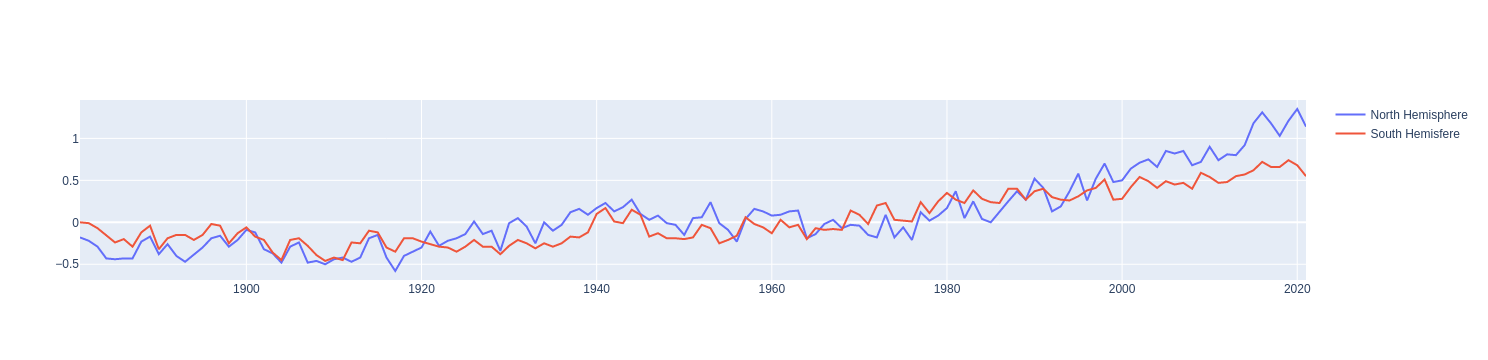

In [5]:
import plotly.graph_objects as go
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=csvgiss.index, y=csvgiss.NHem,
                    mode='lines',
                    name='North Hemisphere'))
fig.add_trace(go.Scatter(x=csvgiss.index, y=csvgiss.SHem,
                    mode='lines',
                    name='South Hemisfere'))

fig.show()